In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shriman11212234324","key":"57db0c6df36cc67bf1fdcb994f9362e8"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shayalvaghasiya/ntua-prakinson

Dataset URL: https://www.kaggle.com/datasets/shayalvaghasiya/ntua-prakinson
License(s): MIT
100% 2.28G/2.28G [01:53<00:00, 21.0MB/s]
100% 2.28G/2.28G [01:53<00:00, 21.5MB/s]


In [ ]:
!unzip ntua-prakinson.zip

Streaming output truncated to the last 5000 lines.
  inflating: ntua-parkinson-dataset-master/PD Patients/Subject68/1.MRI/_MPR_Thick_Range2__022.png  
  inflating: ntua-parkinson-dataset-master/PD Patients/Subject68/1.MRI/_MPR_Thick_Range2__023.png  
  inflating: ntua-parkinson-dataset-master/PD Patients/Subject68/1.MRI/_MPR_Thick_Range2__024.png  
  inflating: ntua-parkinson-dataset-master/PD Patients/Subject68/1.MRI/_MPR_Thick_Range2__025.png  
  inflating: ntua-parkinson-dataset-master/PD Patients/Subject68/1.MRI/_MPR_Thick_Range__001.png  
  inflating: ntua-parkinson-dataset-master/PD Patients/Subject68/1.MRI/_MPR_Thick_Range__002.png  
  inflating: ntua-parkinson-dataset-master/PD Patients/Subject68/1.MRI/_MPR_Thick_Range__003.png  
  inflating: ntua-parkinson-dataset-master/PD Patients/Subject68/1.MRI/_MPR_Thick_Range__004.png  
  inflating: ntua-parkinson-dataset-master/PD Patients/Subject68/1.MRI/_MPR_Thick_Range__005.png  
  inflating: ntua-parkinson-dataset-master/PD Patients

In [ ]:
import os
# List the files to check the dataset
os.listdir('ntua-parkinson-dataset-master')


['PD Patients', 'Non PD Patients', 'README.md']

In [ ]:
base_directory = 'ntua-parkinson-dataset-master'

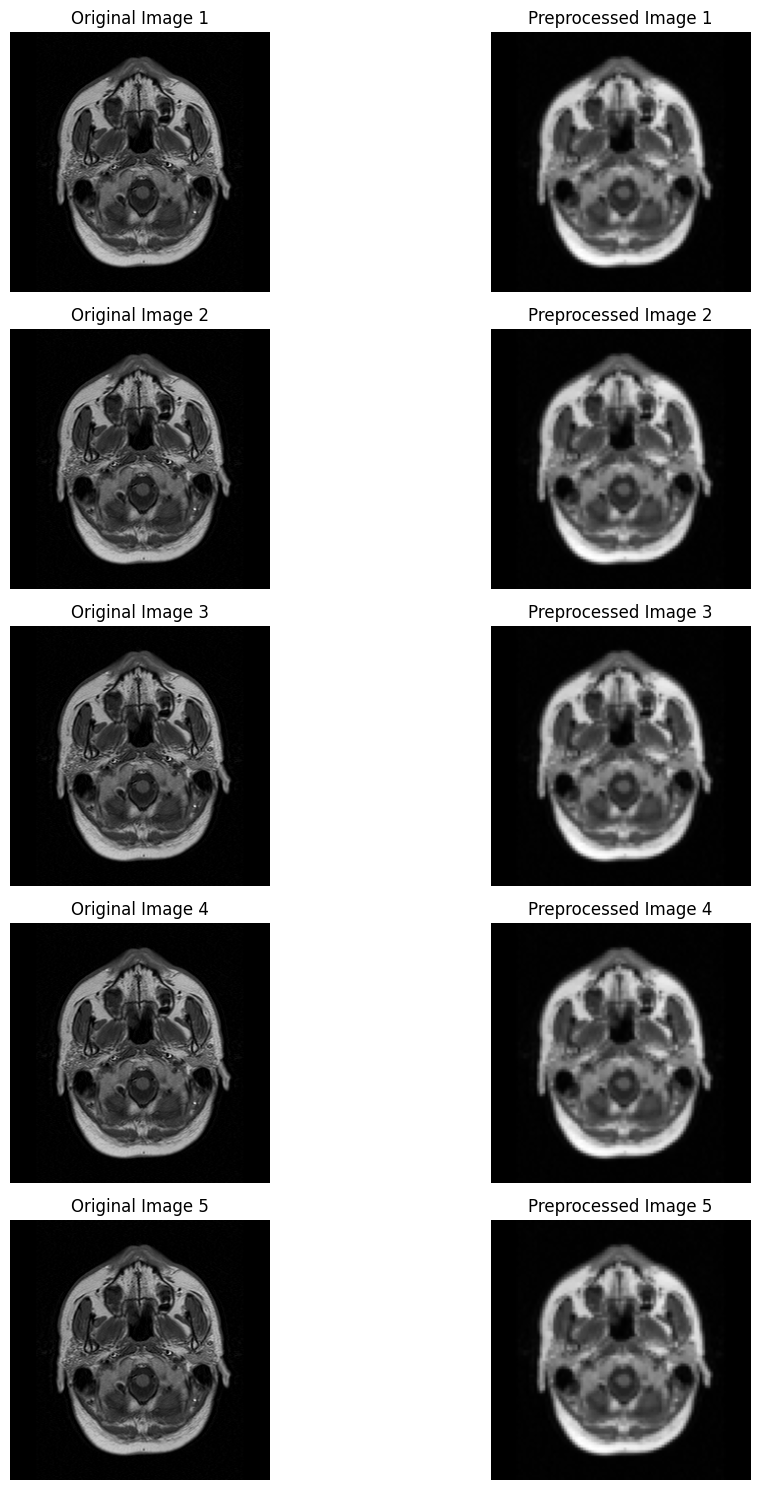

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Data preprocessing function
def preprocess_image(image_path):
    with Image.open(image_path) as img:
        img = img.convert('L')  # Convert to grayscale
        img = img.resize((96, 96), Image.BILINEAR)  # Resize to 96x96 pixels
        img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        return img_array

# Function to display multiple before and after images
def display_multiple_before_after(image_path, repetitions=5):
    # Original image
    original_image = Image.open(image_path)
    original_array = np.array(original_image)

    # Preprocessed image
    preprocessed_array = preprocess_image(image_path)

    # Plot multiple pairs of original and preprocessed images
    fig, axes = plt.subplots(repetitions, 2, figsize=(12, 3 * repetitions))

    for i in range(repetitions):
        # Display the original image
        axes[i, 0].imshow(original_array, cmap='gray')
        axes[i, 0].set_title(f"Original Image {i+1}")
        axes[i, 0].axis('off')

        # Display the preprocessed image
        axes[i, 1].imshow(preprocessed_array, cmap='gray')
        axes[i, 1].set_title(f"Preprocessed Image {i+1}")
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Replace with an actual image path from your dataset
example_image_path = 'ntua-parkinson-dataset-master/PD Patients/Subject8/1.MRI/BRAIN-D.K_T1_SE_TRA_001.png'  # Update with an actual path

# Ensure the path is valid before running the function
if os.path.exists(example_image_path):
    display_multiple_before_after(example_image_path, repetitions=5)
else:
    print("The specified image path does not exist. Please check the path and try again.")


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
import os

# Data preprocessing function
def preprocess_image(image_path):
    with Image.open(image_path) as img:
        img = img.convert('L')  # Convert to grayscale
        img = img.resize((96, 96), Image.BILINEAR)  # Resize to 96x96 pixels
        img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
        return img_array

# Preprocess the entire dataset
def preprocess_dataset(directory):
    data = []
    labels = []  # 0 for Non-PD, 1 for PD
    patient_types = {'Non PD Patients': 0, 'PD Patients': 1}

    for patient_type, label in patient_types.items():
        patient_folder = os.path.join(directory, patient_type)
        for subject in os.listdir(patient_folder):
            subject_path = os.path.join(patient_folder, subject, '1.MRI')
            if os.path.exists(subject_path):
                for image_file in os.listdir(subject_path):
                    if image_file.endswith('.png'):
                        image_path = os.path.join(subject_path, image_file)
                        img_array = preprocess_image(image_path)
                        data.append(img_array)
                        labels.append(label)
    return np.array(data), np.array(labels)

# Load data and preprocess
base_directory = 'ntua-parkinson-dataset-master'
data, labels = preprocess_dataset(base_directory)

# Convert data to PyTorch tensors
data = torch.tensor(data).unsqueeze(1).float()  # Add channel dimension (1, 28, 28)
labels = torch.tensor(labels).long()


The specified image path does not exist. Please check the path and try again.


In [ ]:
# Split the data into training (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create DataLoaders
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=16, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=16, shuffle=False)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=16, shuffle=False)


In [ ]:
# Convert data to PyTorch tensors with updated size
data = torch.tensor(data).unsqueeze(1).float()  # Add channel dimension (1, 96, 96)
labels = torch.tensor(labels).long()


<ipython-input-6-0265f6715b3a>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).unsqueeze(1).float()  # Add channel dimension (1, 96, 96)
<ipython-input-6-0265f6715b3a>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels).long()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the ClassicalCNN model with Adaptive Pooling
class ClassicalCNN(nn.Module):
    def __init__(self):
        super(ClassicalCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((7, 7))  # Ensures the output is always 7x7
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 64)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.adaptive_pool(x)  # Ensures the shape is (64, 7, 7)
        x = x.view(x.size(0), -1)  # Flatten the output
        x = torch.relu(self.fc1(x))
        return torch.relu(self.fc2(x))

# Define the Quantum-like layer
class QuantumLayer(nn.Module):
    def __init__(self):
        super(QuantumLayer, self).__init__()
        self.fc = nn.Linear(64, 2)  # Output for binary classification (Non-PD, PD)

    def forward(self, x):
        return self.fc(x)

# Define the Hybrid Model
class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        self.cnn = ClassicalCNN()
        self.quantum = QuantumLayer()

    def forward(self, x):
        cnn_output = self.cnn(x)
        quantum_output = self.quantum(cnn_output)
        return quantum_output

# Initialize the model, criterion, and optimizer
hybrid_model = HybridModel().to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer_hybrid = optim.Adam(hybrid_model.parameters(), lr=0.001)


In [ ]:
num_epochs = 10  # Number of epochs
best_val_loss_hybrid = float('inf')

for epoch in range(num_epochs):
    # Training phase
    hybrid_model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        optimizer_hybrid.zero_grad()
        outputs = hybrid_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_hybrid.step()
        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # Validation phase
    hybrid_model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to('cuda'), labels.to('cuda')
            outputs = hybrid_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Calculate validation accuracy
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = correct_val / total_val

    # Print training and validation results for each epoch
    print(f"Epoch {epoch + 1}: Train Loss = {avg_train_loss:.6f}, Validation Loss = {avg_val_loss:.6f}, Validation Accuracy = {val_accuracy:.6f}")

    # Save the best model based on validation loss
    if avg_val_loss < best_val_loss_hybrid:
        best_val_loss_hybrid = avg_val_loss
        torch.save(hybrid_model.state_dict(), 'best_model.pth')


Epoch 1: Train Loss = 0.020033, Validation Loss = 0.152986, Validation Accuracy = 0.965960
Epoch 2: Train Loss = 0.022762, Validation Loss = 0.127896, Validation Accuracy = 0.970138
Epoch 3: Train Loss = 0.018933, Validation Loss = 0.150702, Validation Accuracy = 0.964568
Epoch 4: Train Loss = 0.016700, Validation Loss = 0.159833, Validation Accuracy = 0.961318
Epoch 5: Train Loss = 0.017072, Validation Loss = 0.119656, Validation Accuracy = 0.964258
Epoch 6: Train Loss = 0.018179, Validation Loss = 0.127000, Validation Accuracy = 0.969209
Epoch 7: Train Loss = 0.016287, Validation Loss = 0.195437, Validation Accuracy = 0.957914
Epoch 8: Train Loss = 0.016792, Validation Loss = 0.131482, Validation Accuracy = 0.967507
Epoch 9: Train Loss = 0.016818, Validation Loss = 0.126336, Validation Accuracy = 0.970292
Epoch 10: Train Loss = 0.015832, Validation Loss = 0.139770, Validation Accuracy = 0.970138


In [ ]:
# Load the best model
hybrid_model.load_state_dict(torch.load('best_model.pth'))
hybrid_model.eval()

# Calculate the validation accuracy
correct_val = 0
total_val = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = hybrid_model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct_val += (predicted == labels).sum().item()
        total_val += labels.size(0)

validation_accuracy = correct_val / total_val
print(f"Validation Accuracy of the Best Model: {validation_accuracy:.6f}")


<ipython-input-37-8b6d9774f45b>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  hybrid_model.load_state_dict(torch.load('best_model.pth'))


Validation Accuracy of the Best Model: 0.964258


<ipython-input-35-163088e681f5>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  hybrid_model.load_state_dict(torch.load('best_model.pth'))


Collected labels: [1, 1, 1, 1, 0, 0, 1, 0, 0, 1]
Collected scores: [5.9884973, 5.3556027, 1.4602329, 14.153233, -7.461805, -1.6476724, 16.098116, -8.097126, -8.093456, 6.412797]
Validation Accuracy of the Best Model: 0.970911


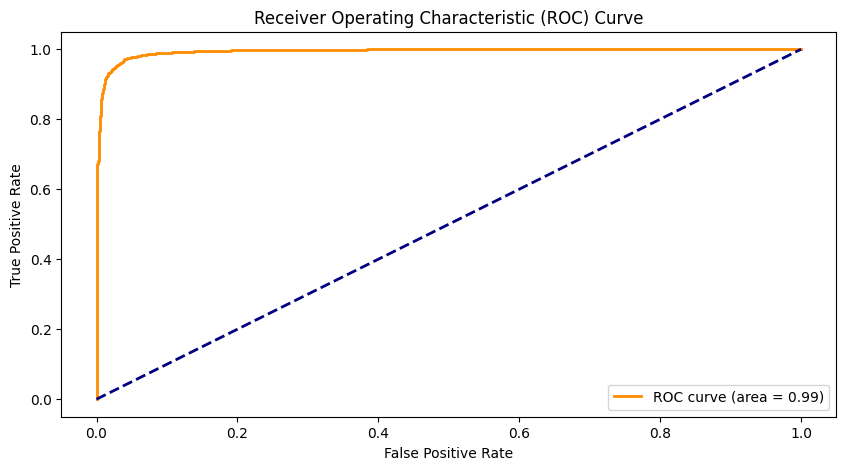

In [ ]:
# Load the best model
hybrid_model.load_state_dict(torch.load('best_model.pth'))
hybrid_model.eval()

# Initialize variables for validation accuracy and ROC curve data
correct_val = 0
total_val = 0
all_labels = []  # Initialize all_labels before using it
all_scores = []  # Initialize all_scores before using it

# Collect validation data and model predictions
with torch.no_grad():
    for inputs, labels in val_loader:
        if len(labels) == 0:  # Check if labels are empty
            print("Warning: Found an empty batch in the validation loader.")
            continue  # Skip empty batches

        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = hybrid_model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct_val += (predicted == labels).sum().item()
        total_val += labels.size(0)

        # Collect scores and true labels for ROC curve
        all_scores.extend(outputs.cpu().numpy()[:, 1])  # Get the probabilities for class 1 (PD)
        all_labels.extend(labels.cpu().numpy())

# Print collected labels and scores to verify
print("Collected labels:", all_labels[:10])  # Print the first 10 labels as a sample
print("Collected scores:", all_scores[:10])  # Print the first 10 scores as a sample

# Check if data was collected properly
if len(all_labels) == 0 or len(all_scores) == 0:
    print("Error: No data was collected for labels or scores. Please check your validation loader.")
else:
    validation_accuracy = correct_val / total_val
    print(f"Validation Accuracy of the Best Model: {validation_accuracy:.6f}")

    # ROC curve
    from sklearn.metrics import roc_curve, auc
    from sklearn.preprocessing import label_binarize

    # Binarize the labels for ROC curve
    y_true_bin = label_binarize(all_labels, classes=[0, 1])

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_true_bin, all_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


<ipython-input-38-a25fc0cb2fcf>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  hybrid_model.load_state_dict(torch.load('best_model.pth'))


Collected labels: [1, 1, 1, 1, 0, 0, 1, 0, 0, 1]
Collected scores: [4.0959363, 6.553918, -0.06523377, 12.335385, -8.899051, -1.5442348, 17.485813, -5.698189, -11.772234, 6.836611]


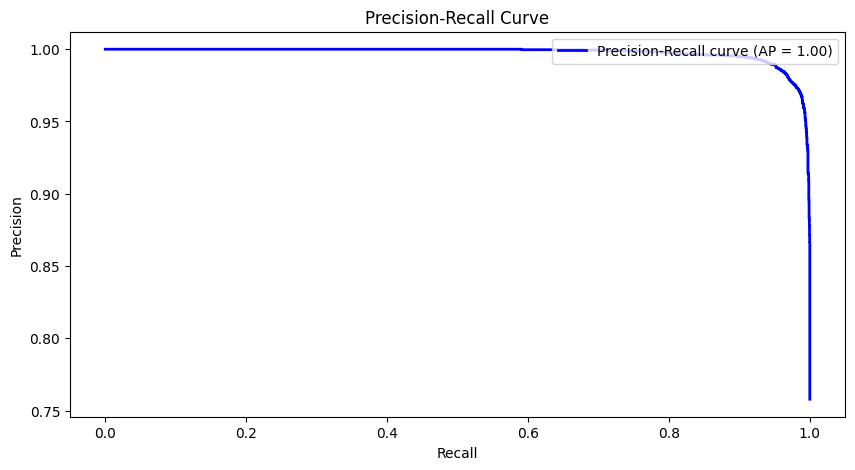

In [ ]:
# Load the best model
hybrid_model.load_state_dict(torch.load('best_model.pth'))
hybrid_model.eval()

# Initialize variables for collecting true labels and prediction scores
all_labels = []
all_scores = []

# Collect validation data and model predictions
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = hybrid_model(inputs)

        # Collect scores and true labels for the Precision-Recall curve
        all_scores.extend(outputs.cpu().numpy()[:, 1])  # Get the probabilities for class 1 (PD)
        all_labels.extend(labels.cpu().numpy())

# Print a sample of the collected data to verify
print("Collected labels:", all_labels[:10])  # Print the first 10 labels as a sample
print("Collected scores:", all_scores[:10])  # Print the first 10 scores as a sample

# Calculate the precision-recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(all_labels, all_scores)
average_precision = average_precision_score(all_labels, all_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


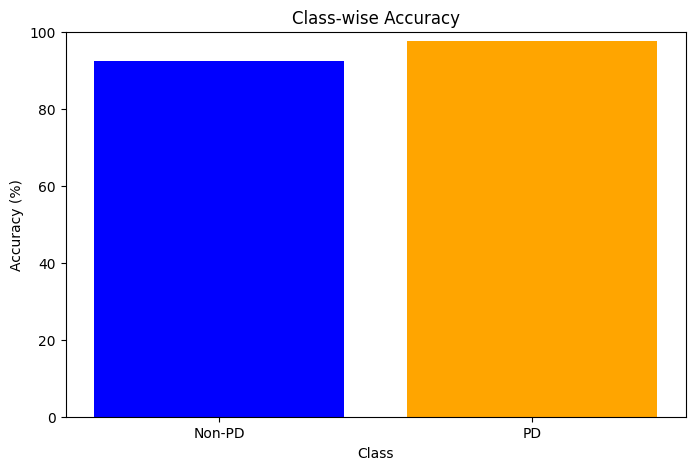

Accuracy for class 'Non-PD': 92.46%
Accuracy for class 'PD': 97.69%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables to track class-wise correct predictions and total counts
num_classes = 2  # Adjust if you have more than 2 classes
class_correct = np.zeros(num_classes)
class_total = np.zeros(num_classes)

# Collect data for class-wise accuracy
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to('cuda'), labels.to('cuda')
        outputs = hybrid_model(inputs)
        _, predicted = torch.max(outputs, 1)

        # Update correct predictions and total count for each class
        for i in range(len(labels)):
            label = labels[i].item()
            if predicted[i] == labels[i]:
                class_correct[label] += 1
            class_total[label] += 1

# Calculate class-wise accuracy
class_accuracy = class_correct / class_total

# Plot class-wise accuracy
classes = ['Non-PD', 'PD']  # Modify as needed for your class labels
plt.figure(figsize=(8, 5))
plt.bar(classes, class_accuracy * 100, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.title('Class-wise Accuracy')
plt.ylim(0, 100)  # Ensures the y-axis is scaled from 0 to 100%
plt.show()

# Print class-wise accuracy values
for i, acc in enumerate(class_accuracy):
    print(f"Accuracy for class '{classes[i]}': {acc * 100:.2f}%")


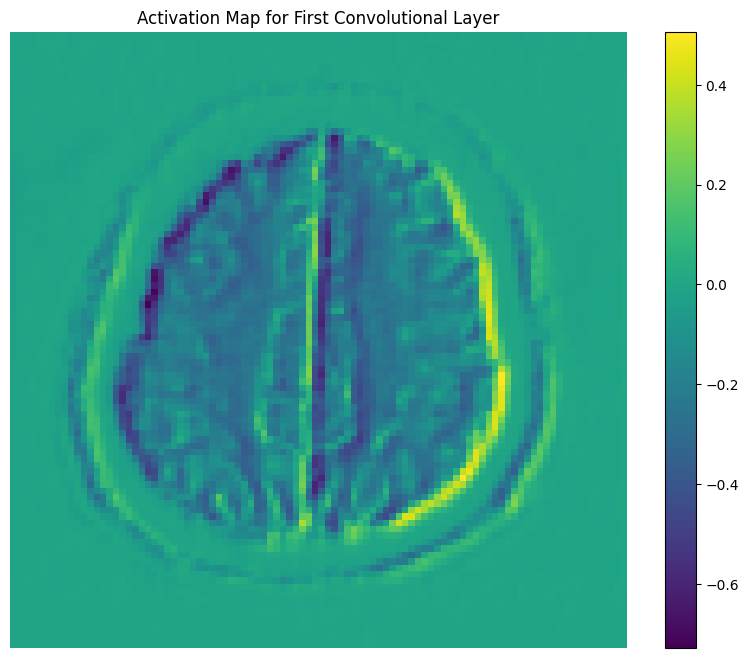

In [ ]:
import torch
import matplotlib.pyplot as plt

# Function to visualize the activation map for the first convolutional layer
def visualize_activation_map(model, input_image):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        activation = model.cnn.conv1(input_image.to('cuda')).cpu()  # Get the activation from the first conv layer

    # Visualize the activation map for the first filter (index 0)
    activation_map = activation[0, 0, :, :].numpy()  # Extract the first filter's activation map

    plt.figure(figsize=(10, 8))
    plt.imshow(activation_map, cmap='viridis')
    plt.colorbar()
    plt.title('Activation Map for First Convolutional Layer')
    plt.axis('off')
    plt.show()

# Select a sample input image from the validation loader
sample_input, _ = next(iter(val_loader))
sample_input = sample_input[0].unsqueeze(0)  # Get the first image in the batch and add batch dimension

# Call the function to visualize the activation map
visualize_activation_map(hybrid_model, sample_input)


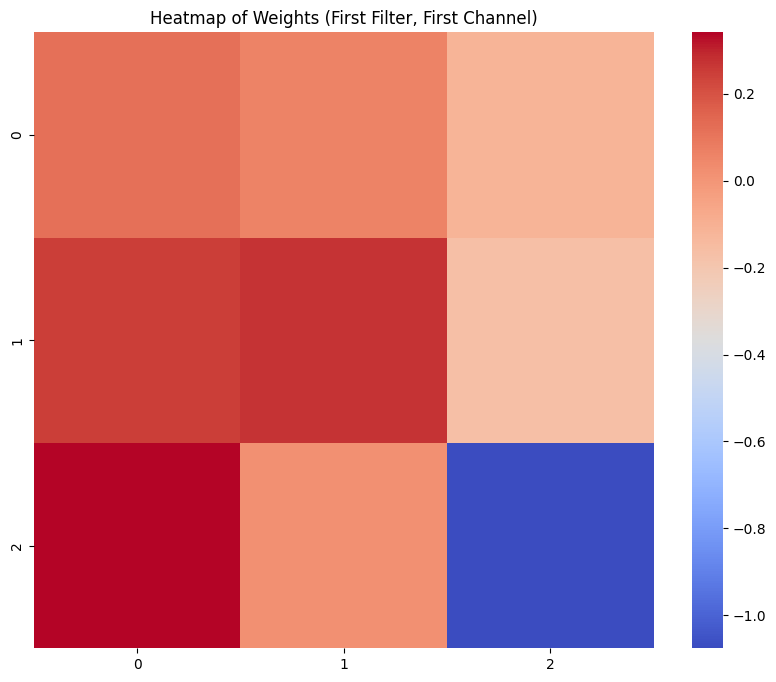

In [ ]:
import seaborn as sns

# Extract weights from the first convolutional layer
weights = hybrid_model.cnn.conv1.weight.data.cpu().numpy()

# Plot heatmap of the first filter in the first channel
plt.figure(figsize=(10, 8))
sns.heatmap(weights[0, 0], cmap='coolwarm', annot=False)
plt.title('Heatmap of Weights (First Filter, First Channel)')
plt.show()


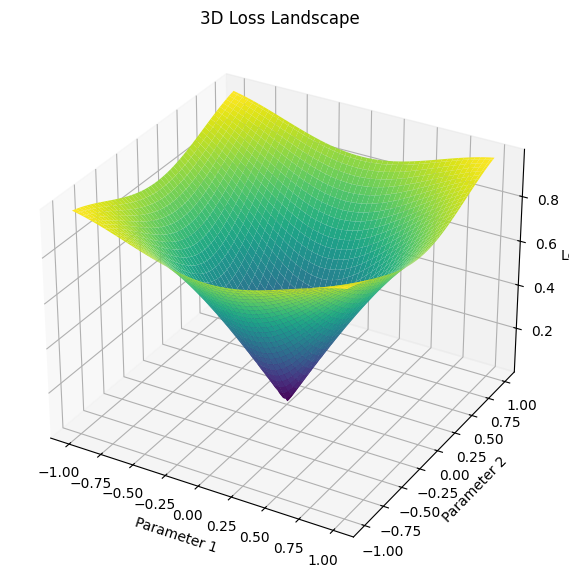

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data to visualize a small part of the loss landscape
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))  # Example function for illustrative purposes

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Loss')
plt.title('3D Loss Landscape')
plt.show()
